# Import

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Kinetik Model

In [2]:
def complete_model(y, t, params):
    mRNA_LhGR, LhGR, Dex, Dex_LhGR, TMV = y

    # parameter
    k_transcr_LhGR = params['k_transcr_LhGR']
    k_degrad_mRNA = params['k_degrad_mRNA']
    k_transl_LhGR = params['k_transl_LhGR']
    k_degrad_LhGR = params['k_degrad_LhGR']
    gene_LhGR = params['gene_LhGR']
    k_on = params['k_on']
    k_off = params['k_off']
    alpha = params['alpha']
    Kd = params['Kd']
    n = params['n']
    k_degrad_TMV = params['k_degrad_TMV']

    # ordinary differential equation
    dmRNA_LhGR_dt = k_transcr_LhGR * gene_LhGR - k_degrad_mRNA * mRNA_LhGR
    dLhGR_dt = k_transl_LhGR * mRNA_LhGR - k_degrad_LhGR * LhGR - k_on * Dex * LhGR + k_off * Dex_LhGR
    dDex_dt = -k_on * Dex * LhGR + k_off * Dex_LhGR
    dDex_LhGR_dt = k_on * Dex * LhGR - k_off * Dex_LhGR
    dTMV_dt = (alpha * (Dex_LhGR**n)/(Kd + Dex_LhGR**n)) - k_degrad_TMV * TMV

    return [dmRNA_LhGR_dt, dLhGR_dt, dDex_dt, dDex_LhGR_dt, dTMV_dt]

In [3]:
# Parameter model
params = {
    'k_transcr_LhGR': 0.013,      
    'k_degrad_mRNA': 0.0005775,   
    'k_transl_LhGR': 0.01,       
    'k_degrad_LhGR': 0.0005775,   
    'gene_LhGR': 1.0,             
    'k_on': 5.1e3,                
    'k_off': 2e-6,             
    'alpha': 0.015,              
    'Kd': 5.2e-9,                 
    'n': 2,                       
    'k_degrad_TMV': 0.00027              
}

# Prediksi Dosis Dexamethasone

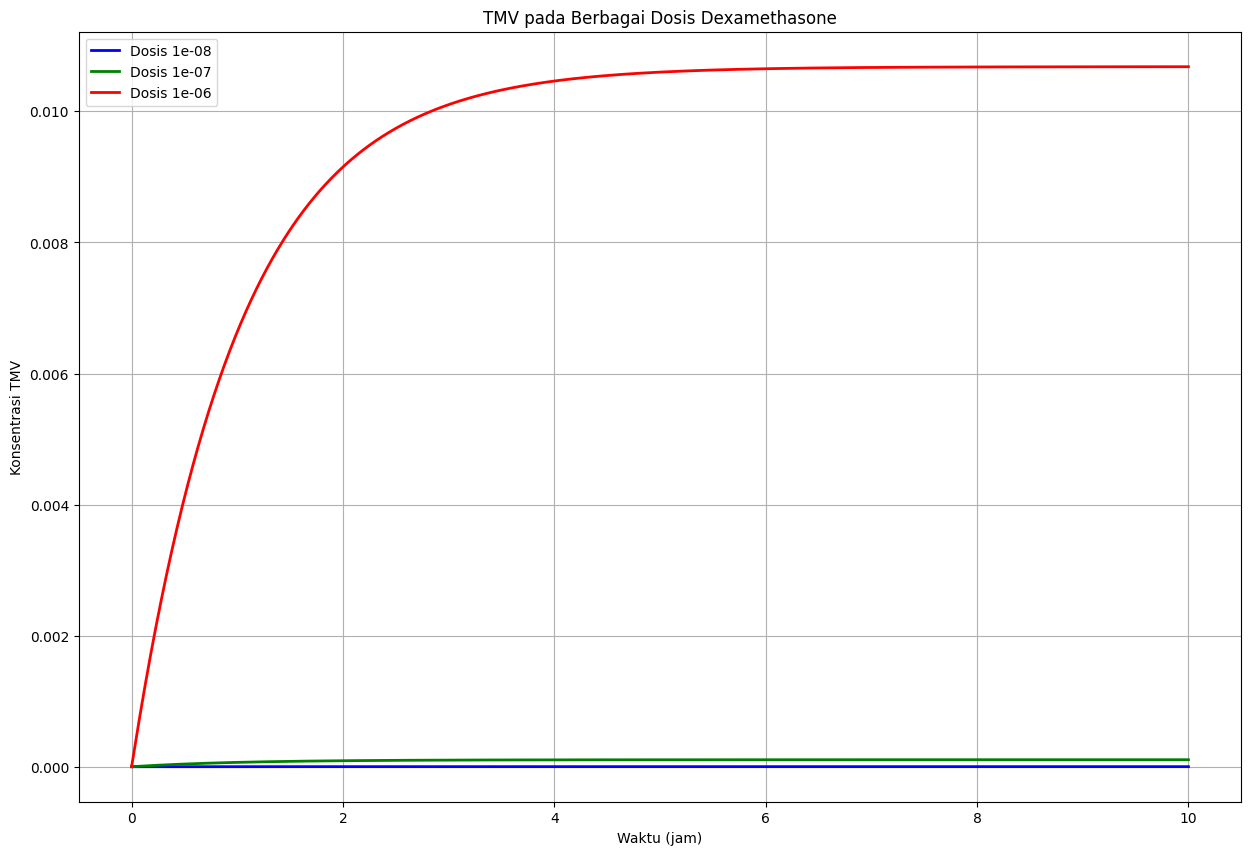

In [4]:
dosis = [1e-8, 1e-7, 1e-6]
results = []


plt.figure(figsize=(15,10))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, dose in enumerate(dosis):
    y0 = [0, 0, dose, 0, 0]

    # Menyelesaikan sistem persamaan diferensial
    t = np.linspace(0, 10*3600, 1000)
    solution = odeint(complete_model, y0, t, args=(params,))

    # Menyimpan hasil
    results.append({
        'dosis': dose,
        'TMV_maks': np.max(solution[:, 4]),
        'TMV_akhir': solution[-1, 4],
        'LhGR_maks': np.max(solution[:, 1]),
        'Dex_LhGR_maks': np.max(solution[:, 3])
    })

    plt.plot(t/3600, solution[:, 4], label=f'Dosis {dose}', color=colors[i], linewidth=2)
    
plt.title('TMV pada Berbagai Dosis Dexamethasone')
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi TMV')
plt.legend()
plt.grid(True)

In [5]:
for result in results:
    if result['TMV_maks'] > (0.6851/1000):
        result["Target TMV"] = "Tercapai"
    else:
        result["Target TMV"] = "Tidak"

In [6]:
result_df = pd.DataFrame(results)
result_df

,dosis,TMV_maks,TMV_akhir,LhGR_maks,Dex_LhGR_maks,Target TMV
0,1.000000e-08,0.000001,0.000001,389.797783,1.474703e-08,Tidak
1,1.000000e-07,0.000107,0.000107,389.797784,1.059721e-07,Tidak
2,1.000000e-06,0.010681,0.010681,389.797783,1.000906e-06,Tercapai


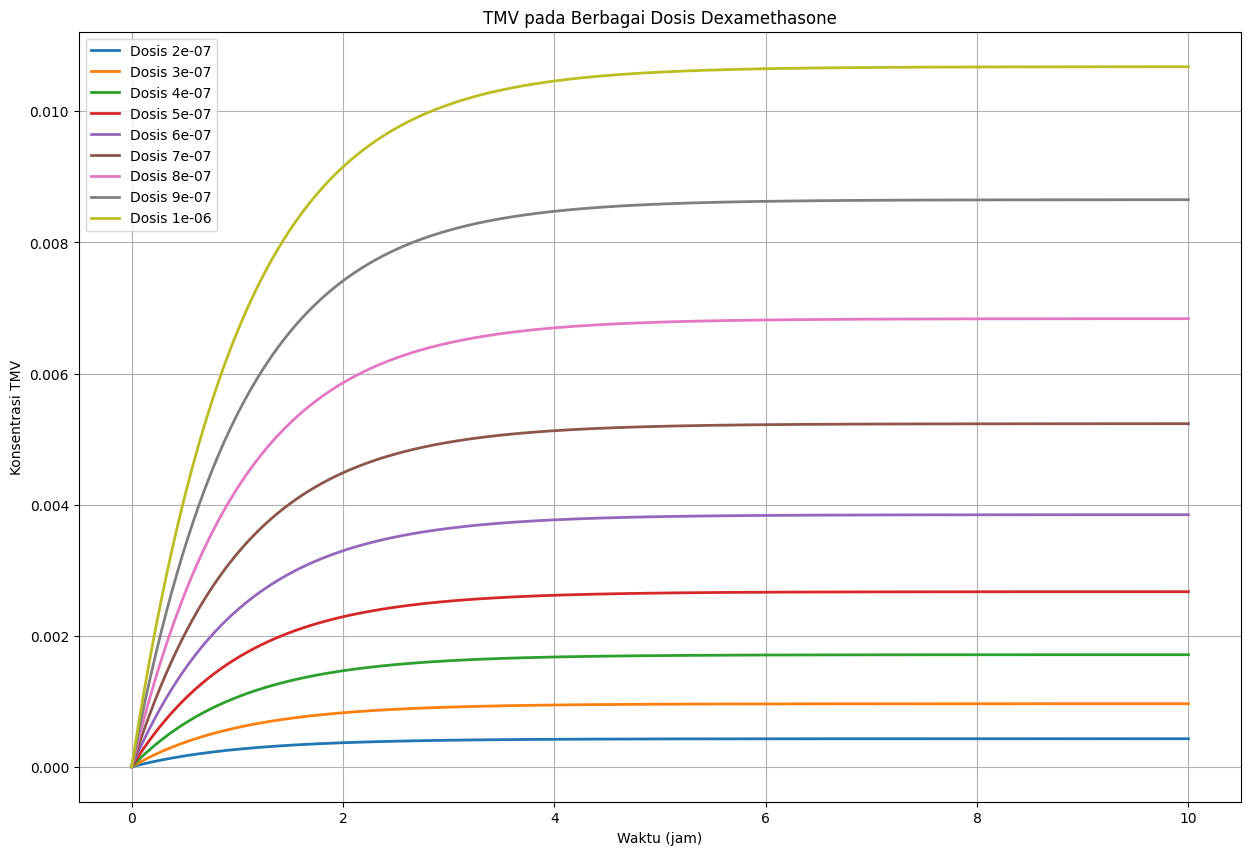

In [7]:
dosis = [2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7, 1e-6]
results = []


plt.figure(figsize=(15,10))
colors = colors = plt.cm.tab10.colors

for i, dose in enumerate(dosis):
    y0 = [0, 0, dose, 0, 0]

    # Menyelesaikan sistem persamaan diferensial
    t = np.linspace(0, 10*3600, 1000)
    solution = odeint(complete_model, y0, t, args=(params,))

    # Menyimpan hasil
    results.append({
        'dosis': dose,
        'TMV_maks': np.max(solution[:, 4]),
        'TMV_akhir': solution[-1, 4],
        'LhGR_maks': np.max(solution[:, 1]),
        'Dex_LhGR_maks': np.max(solution[:, 3])
    })

    plt.plot(t/3600, solution[:, 4], label=f'Dosis {dose}', color=colors[i], linewidth=2)
    
plt.title('TMV pada Berbagai Dosis Dexamethasone')
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi TMV')
plt.legend()
plt.grid(True)

In [8]:
for result in results:
    if result['TMV_maks'] > (0.6851/1000):
        result["Target TMV"] = "Tercapai"
    else:
        result["Target TMV"] = "Tidak"

In [9]:
result_df = pd.DataFrame(results)
result_df

,dosis,TMV_maks,TMV_akhir,LhGR_maks,Dex_LhGR_maks,Target TMV
0,2.000000e-07,0.000427,0.000427,389.797784,2.021625e-07,Tidak
1,3.000000e-07,0.000961,0.000961,389.797782,3.012244e-07,Tercapai
2,4.000000e-07,0.001709,0.001709,389.797782,4.018785e-07,Tercapai
3,5.000000e-07,0.002671,0.002671,389.797783,5.015580e-07,Tercapai
4,6.000000e-07,0.003846,0.003846,389.797783,6.010638e-07,Tercapai
5,7.000000e-07,0.005234,0.005234,389.797783,7.012247e-07,Tercapai
6,8.000000e-07,0.006836,0.006836,389.797783,8.009089e-07,Tercapai
7,9.000000e-07,0.008652,0.008652,389.797784,9.011794e-07,Tercapai
8,1.000000e-06,0.010681,0.010681,389.797783,1.000906e-06,Tercapai


# Hasil Akhir

In [10]:
# Kondisi awal
y0 = [0, 0, 3e-7, 0, 0]  # [mRNA_LhGR, LhGR, Dex, Dex_LhGR, TMV]

# Waktu simulasi (24 jam dalam detik)
t = np.linspace(0, 10*3600, 1000)

solution = odeint(complete_model, y0, t, args=(params,))

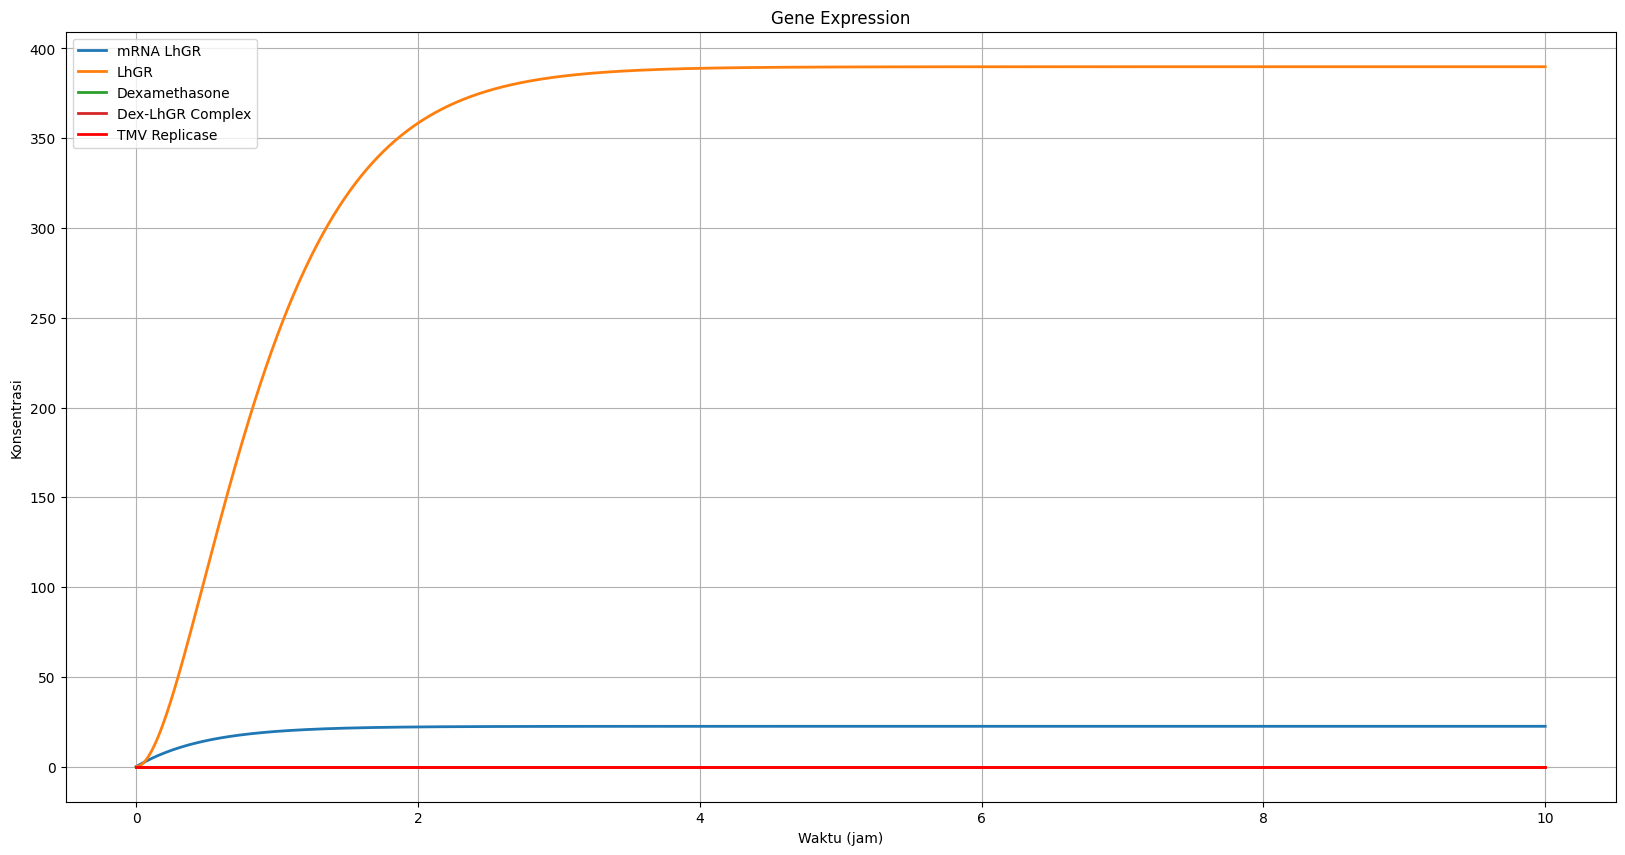

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(t/3600, solution[:, 0], label='mRNA LhGR', linewidth=2)
plt.plot(t/3600, solution[:, 1], label='LhGR', linewidth=2)
plt.plot(t/3600, solution[:, 2], label='Dexamethasone', linewidth=2)
plt.plot(t/3600, solution[:, 3], label='Dex-LhGR Complex', linewidth=2)
plt.plot(t/3600, solution[:, 4], label='TMV Replicase', color='red', linewidth=2)
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi')
plt.title('Gene Expression')
plt.legend()
plt.grid(True)
plt.show()

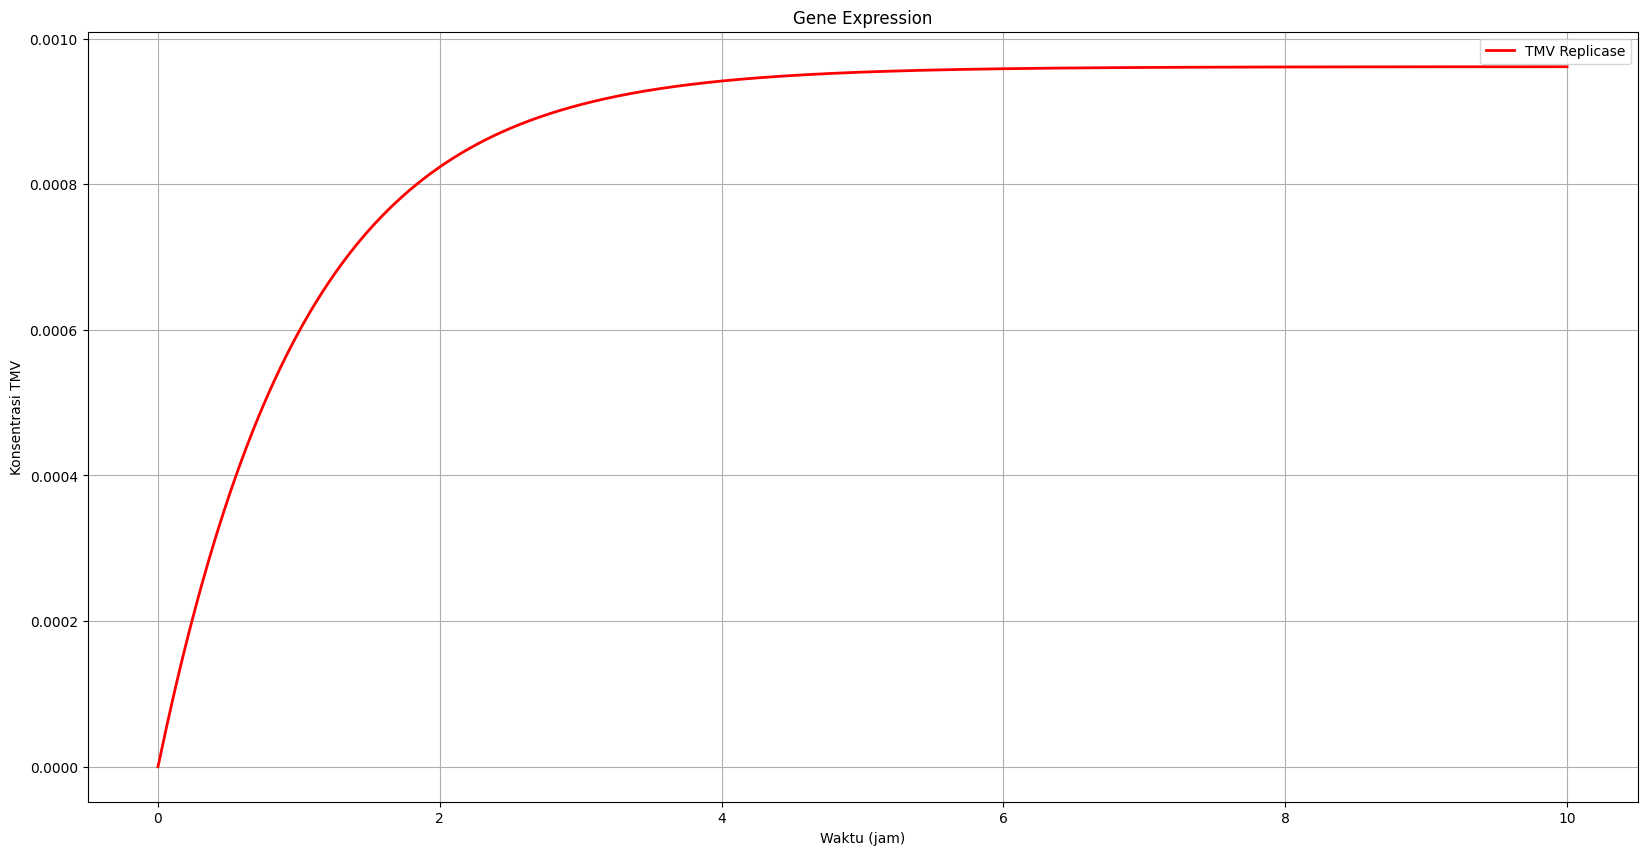

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(t/3600, solution[:, 4], label='TMV Replicase', color='red', linewidth=2)
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi TMV')
plt.title('Gene Expression')
plt.legend()
plt.grid(True)
plt.show()